In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json

data_loc="../logs/"

def load_file(fname):
    f=open(fname,'r')
    headings_t=[]
    headings=[]
    turns_t=[]
    turns=[]
    tracks_t=[]
    tracks=[]
    tracks_kalman=[]
    moves_t=[]
    moves=[]
    dists_t=[]
    dists=[]
    for line in f.readlines():
        dat=json.loads(line)
        timestamp=dat["timestamp"]
        if "compass_heading" in dat:
            headings_t.append(timestamp)
            headings.append(dat["compass_heading"])
        if "command" in dat:
            if dat["command"]["address"]==["drive","translate"]:
                moves_t.append(timestamp)
                moves.append(dat["command"]["value"][0])
                #turns_t.append(timestamp)
                #turns.append(dat["command"]["value"][2])                
        if "tracked_objects" in dat:
            name="sports ball"
            for obj in dat["tracked_objects"]:                
                if obj["label"]==name:
                    tracks_t.append(timestamp)
                    tracks.append( obj["last_update"][0] )
                    tracks_kalman.append( obj["xywh"][0] )
        if "ultrasonic_sensor/last_measurement" in dat:
            dists_t.append(timestamp)
            dists.append(dat["ultrasonic_sensor/last_measurement"]["average_distance"])
                    

    f.close()
    offset=headings_t[0]
    headings=np.array(headings)
    headings_t=np.array(headings_t)-offset
    turns=np.array(turns)
    turns_t=np.array(turns_t)-offset
    tracks=np.array(tracks)
    tracks_kalman=np.array(tracks_kalman)
    tracks_t=np.array(tracks_t)-offset
    
    dists_t=np.array(dists_t)-offset
    dists=np.array(dists)
    moves_t=np.array(moves_t)-offset
    moves=np.array(moves)
    

    return dists_t,dists,moves_t,moves,headings_t,headings
    #return headings_t,headings,turns_t,turns,tracks_t,tracks,tracks_kalman


<ipython-input-2-779ac66a2273>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-779ac66a2273>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-779ac66a2273>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-779ac66a2273>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-779ac66a2273>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


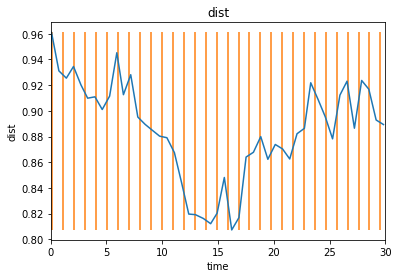

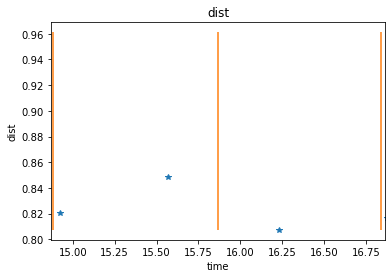

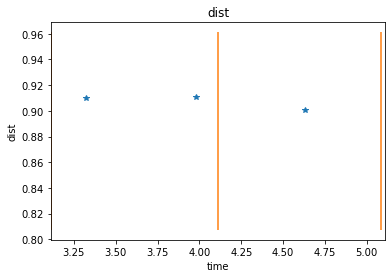

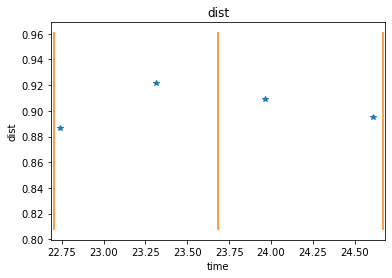

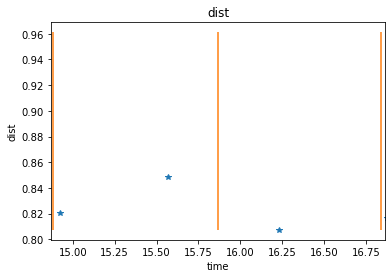

In [2]:
import random
#headings_t,headings,turns_t,turns,tracks_t,tracks=load_file(data_loc+"sensor_log_20210115-101349.txt")
dists_t,dists,moves_t,moves,headings_t,headings=load_file(data_loc+"sensor_log_20210115-162318.txt")


fig, ax = plt.subplots()
plt.xlim(0,30)
ax.set(xlabel='time', ylabel='dist',title='dist')
ax.plot(dists_t,dists)
ax.vlines(moves_t,np.min(dists),np.max(dists),color="C1")
fig.show()

for i in range(4):
    j=random.choice(range(len(moves_t)))
    fig, ax = plt.subplots()
    plt.xlim(moves_t[j]-1.0,moves_t[j]+1.0)    
    ax.set(xlabel='time', ylabel='dist',title='dist')
    ax.plot(dists_t,dists,'*')
    ax.vlines(moves_t,np.min(dists),np.max(dists),color="C1")
    fig.show()

<ipython-input-9-5f422faaa007>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-9-5f422faaa007>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-9-5f422faaa007>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-9-5f422faaa007>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-9-5f422faaa007>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-9-5f422faaa007>:24: UserWarning: Matplotlib is curr

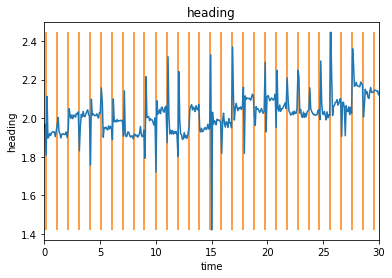

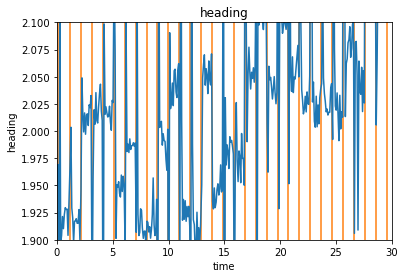

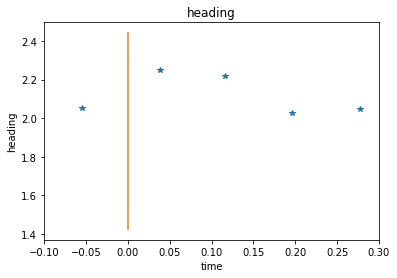

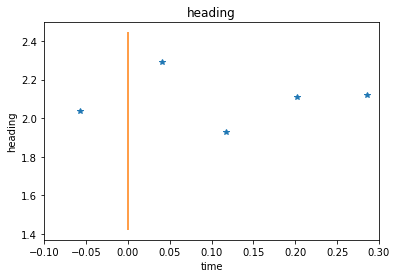

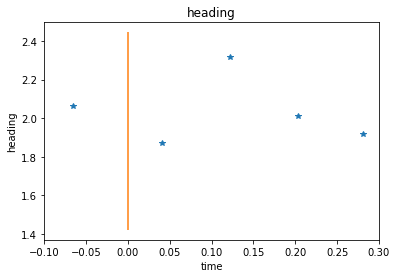

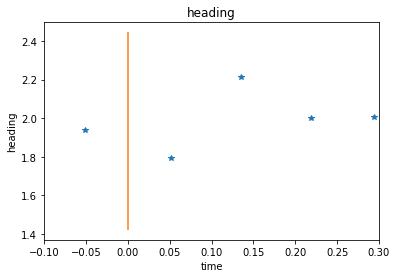

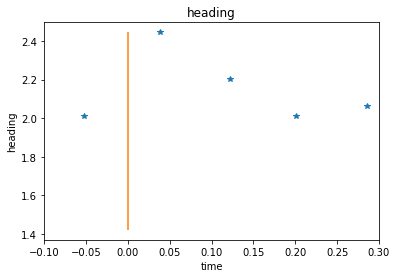

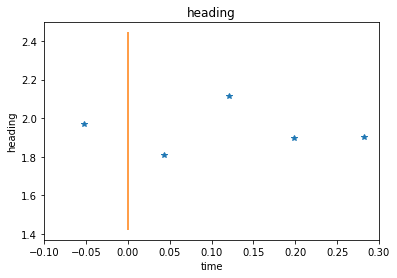

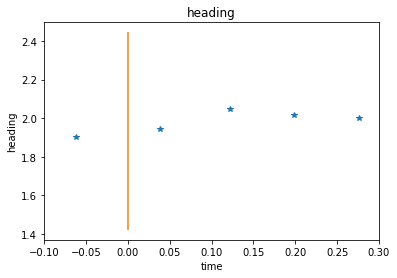

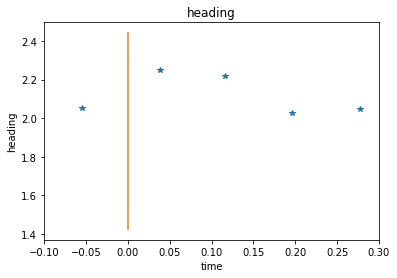

In [9]:
fig, ax = plt.subplots()
plt.xlim(0,30)
ax.set(xlabel='time', ylabel='heading',title='heading')
ax.plot(headings_t,headings)
ax.vlines(moves_t,np.min(headings),np.max(headings),color="C1")
fig.show()

fig, ax = plt.subplots()
plt.xlim(0,30)
plt.ylim(1.9,2.1)
ax.set(xlabel='time', ylabel='heading',title='heading')
ax.plot(headings_t,headings)
ax.vlines(moves_t,np.min(headings),np.max(headings),color="C1")
fig.show()

for i in range(8):
    j=random.choice(range(len(moves_t)))
    fig, ax = plt.subplots()
    #plt.xlim(moves_t[j]-0.3,moves_t[j]+0.5)    
    plt.xlim(-0.1,0.3)    
    ax.set(xlabel='time', ylabel='heading',title='heading')
    ax.plot(headings_t-moves_t[j],headings,'*')
    ax.vlines(moves_t-moves_t[j],np.min(headings),np.max(headings),color="C1")
    fig.show()